In [1]:
import pandas as pd
import numpy as np

# Part 1 Data Wrangling

In [3]:
#Get a general overview of 2017 data
df_2017 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2017.csv")
df_2017.head(5)

,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,Other.3,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Start Date (UTC),Submit Date (UTC),Network ID
0,e49fe87572831232dcfa51b376b22039,0,100-500,1.0,1.0,No,Yes,No,I don't know,I don't know,...,Female,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:32:04,2018-05-16 12:42:40,464b7a12f1
1,a1eede444ac024928d247a8372d54931,0,100-500,1.0,1.0,Yes,Yes,No,No,I don't know,...,male,United Kingdom,NaN,NaN,NaN,United Kingdom,NaN,2018-05-16 12:31:13,2018-05-16 12:40:40,464b7a12f1
2,37d3fd67f62bd1e0a2dea4f9cd440d98,0,6-25,1.0,1.0,I don't know,No,I don't know,No,Yes,...,male,United States of America,Missouri,White,NaN,United States of America,Missouri,2018-05-09 05:34:05,2018-05-09 05:46:04,1eb7e0cb94
3,519b759442c1cab0e9b5a8a1acb1b216,0,More than 1000,1.0,1.0,Yes,Yes,I don't know,I don't know,Yes,...,Male,United States of America,Washington,White,NaN,United States of America,Washington,2018-05-04 23:19:14,2018-05-04 23:23:23,63852edbc4
4,ef0af4927b575b1a3e607c11ca37870e,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,female,United States of America,Illinois,More than one of the above,NaN,United States of America,Illinois,2018-05-03 00:40:24,2018-05-03 00:53:20,43237889f1


In [4]:
#remove the unnecessary first column
df_2017 = df_2017.drop(df_2017.columns[[0]], axis=1)

In [5]:
#add a column specifying the survey year
df_2017['Survey Year'] = 2017

In [6]:
#get questions we're interested in
df_2017_GQ = df_2017.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [7]:
#check the resulting dataframe
df_2017_GQ.info(verbose=False)
df_2017_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 14 entries, <strong>Are you self-employed?</strong> to Survey Year
dtypes: float64(3), int64(2), object(9)
memory usage: 82.8+ KB


,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Survey Year
0,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
1,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
2,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri,2017
3,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,2017
4,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois,2017


In [8]:
#remove special characters/normalize questions
oldnames_2017 = ('<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you <strong>live</strong> in?',
       'What US state or territory do you <strong>live</strong> in?',
       'What is your race?', 'What country do you <strong>work</strong> in?',
       'What US state or territory do you <strong>work</strong> in?',
       'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2017_GQ.rename(columns={i:j for i,j in zip(oldnames_2017,newnames)}, inplace=True)

<ipython-input-8-bcdd0ce5247a>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2017_GQ.rename(columns={i:j for i,j in zip(oldnames_2017,newnames)}, inplace=True)


In [9]:
df_2017_GQ.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,0,100-500,1.0,1.0,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
1,0,100-500,1.0,1.0,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN,2017
2,0,6-25,1.0,1.0,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri,2017
3,0,More than 1000,1.0,1.0,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,2017
4,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois,2017


In [10]:
#Get a general overview of 2018 data
df_2018 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2018.csv")
df_2018.info(verbose=False)
df_2018.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 123 entries, # to Network ID
dtypes: float64(31), int64(9), object(83)
memory usage: 400.8+ KB


,#,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,Other.3,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Start Date (UTC),Submit Date (UTC),Network ID
0,e44a0a34f2465940beda2a1537e9b99e,0,More than 1000,1.0,0.0,Yes,Yes,Yes,Yes,Yes,...,Female,Canada,NaN,NaN,NaN,Canada,NaN,2018-12-29 23:46:38,2018-12-30 00:00:03,4bbb884ccc
1,0d698e3beca20fb75f19b9d528e36d73,0,More than 1000,1.0,1.0,Yes,Yes,No,I don't know,I don't know,...,male,United States of America,Massachusetts,White,NaN,United States of America,Massachusetts,2018-12-27 21:40:40,2018-12-27 21:45:45,275e7543bd
2,61a40c9071eb36fa9caa254d31500c41,0,6-25,0.0,1.0,Yes,Yes,No,No,I don't know,...,Male,United States of America,Florida,White,NaN,United States of America,Florida,2018-12-21 17:37:43,2018-12-21 18:08:01,43994c3dba
3,f8624340bead7deb08abb766704ddf6b,0,6-25,1.0,1.0,No,No,No,No,I don't know,...,male,Norway,NaN,NaN,NaN,Norway,NaN,2018-12-21 16:37:56,2018-12-21 16:44:44,907b3a3faa
4,31d3ae93b68d79e504a0a643601b6b1e,0,26-100,1.0,1.0,Yes,Yes,Yes,Yes,Yes,...,Ostensibly Male,United States of America,Tennessee,White,NaN,United States of America,Tennessee,2018-12-20 19:39:02,2018-12-20 20:58:34,26df20fea3


In [11]:
#remove the unnecessary first column
df_2018 = df_2018.drop(df_2018.columns[[0]], axis=1)

In [12]:
#add a column specifying the survey year
df_2018['Survey Year'] = 2018

In [13]:
#get questions we're interested in
df_2018_GQ = df_2018.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [14]:
#check the resulting dataframe
df_2018_GQ.info(verbose=False)
df_2018_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 14 entries, <strong>Are you self-employed?</strong> to Survey Year
dtypes: float64(2), int64(3), object(9)
memory usage: 45.7+ KB


,<strong>Are you self-employed?</strong>,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you <strong>live</strong> in?,What US state or territory do you <strong>live</strong> in?,What is your race?,What country do you <strong>work</strong> in?,What US state or territory do you <strong>work</strong> in?,Survey Year
0,0,More than 1000,1.0,0.0,Yes,Yes,57,Female,Canada,NaN,NaN,Canada,NaN,2018
1,0,More than 1000,1.0,1.0,Yes,Yes,29,male,United States of America,Massachusetts,White,United States of America,Massachusetts,2018
2,0,6-25,0.0,1.0,Yes,Yes,46,Male,United States of America,Florida,White,United States of America,Florida,2018
3,0,6-25,1.0,1.0,No,No,34,male,Norway,NaN,NaN,Norway,NaN,2018
4,0,26-100,1.0,1.0,Yes,Yes,29,Ostensibly Male,United States of America,Tennessee,White,United States of America,Tennessee,2018


In [15]:
#remove special characters/normalize questions
oldnames_2018 = ('<strong>Are you self-employed?</strong>',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you <strong>live</strong> in?',
       'What US state or territory do you <strong>live</strong> in?',
       'What is your race?', 'What country do you <strong>work</strong> in?',
       'What US state or territory do you <strong>work</strong> in?',
       'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2018_GQ.rename(columns={i:j for i,j in zip(oldnames_2018,newnames)},inplace=True)

<ipython-input-15-981c8291bf7e>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_GQ.rename(columns={i:j for i,j in zip(oldnames_2018,newnames)},inplace=True)


In [16]:
df_2018_GQ.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,0,More than 1000,1.0,0.0,Yes,Yes,57,Female,Canada,NaN,NaN,Canada,NaN,2018
1,0,More than 1000,1.0,1.0,Yes,Yes,29,male,United States of America,Massachusetts,White,United States of America,Massachusetts,2018
2,0,6-25,0.0,1.0,Yes,Yes,46,Male,United States of America,Florida,White,United States of America,Florida,2018
3,0,6-25,1.0,1.0,No,No,34,male,Norway,NaN,NaN,Norway,NaN,2018
4,0,26-100,1.0,1.0,Yes,Yes,29,Ostensibly Male,United States of America,Tennessee,White,United States of America,Tennessee,2018


In [17]:
#Get a general overview of 2019 data
df_2019 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2019.csv")
df_2019.head(5)

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,I think opening up more conversation around th...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska


In [18]:
#add a column specifying the survey year
df_2019['Survey Year'] = 2019
df_2019.head(5)

,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,False,26-100,True,True,I don't know,No,Yes,Yes,I don't know,Very easy,...,NaN,False,25,Male,United States of America,Nebraska,White,United States of America,Nebraska,2019
1,False,26-100,True,True,Yes,No,No,Yes,Yes,I don't know,...,NaN,False,51,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
2,False,26-100,True,True,I don't know,No,No,I don't know,I don't know,Somewhat difficult,...,Thank you,True,27,Male,United States of America,Illinois,White,United States of America,Illinois,2019
3,False,100-500,True,True,I don't know,No,Yes,Yes,Yes,Very easy,...,NaN,False,37,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
4,False,26-100,True,True,I don't know,No,I don't know,I don't know,I don't know,I don't know,...,NaN,False,46,m,United States of America,Nebraska,White,United States of America,Nebraska,2019


In [19]:
#get questions we're interested in
df_2019_GQ = df_2019.iloc[:,np.r_[0:6,75:83]]

In [20]:
#check the resulting dataframe
df_2019_GQ.info(verbose=False)
df_2019_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Columns: 14 entries, *Are you self-employed?* to Survey Year
dtypes: bool(1), int64(2), object(11)
memory usage: 36.2+ KB


,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,False,26-100,True,True,I don't know,No,25,Male,United States of America,Nebraska,White,United States of America,Nebraska,2019
1,False,26-100,True,True,Yes,No,51,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
2,False,26-100,True,True,I don't know,No,27,Male,United States of America,Illinois,White,United States of America,Illinois,2019
3,False,100-500,True,True,I don't know,No,37,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
4,False,26-100,True,True,I don't know,No,46,m,United States of America,Nebraska,White,United States of America,Nebraska,2019


In [21]:
#remove special characters/normalize questions
oldnames_2019 = ('*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you *live* in?',
       'What US state or territory do you *live* in?', 'What is your race?',
       'What country do you *work* in?',
       'What US state or territory do you *work* in?', 'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2019_GQ.rename(columns={i:j for i,j in zip(oldnames_2019,newnames)}, inplace=True)

<ipython-input-21-44907b0b0cd2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_GQ.rename(columns={i:j for i,j in zip(oldnames_2019,newnames)}, inplace=True)


In [22]:
df_2019_GQ.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,False,26-100,True,True,I don't know,No,25,Male,United States of America,Nebraska,White,United States of America,Nebraska,2019
1,False,26-100,True,True,Yes,No,51,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
2,False,26-100,True,True,I don't know,No,27,Male,United States of America,Illinois,White,United States of America,Illinois,2019
3,False,100-500,True,True,I don't know,No,37,male,United States of America,Nebraska,White,United States of America,Nebraska,2019
4,False,26-100,True,True,I don't know,No,46,m,United States of America,Nebraska,White,United States of America,Nebraska,2019


In [23]:
#Get a general overview of 2020 data
df_2020 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2020.csv")
df_2020.head(5)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
0,zwrffw6ykfo82ft1twvzwrffw6c6wsfv,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,45,Male,United States of America,Connecticut,White,NaN,United States of America,Connecticut
1,zhdmhaa8r0125c4zmoi7qzhdmtjrakhm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,24,female,Russia,NaN,NaN,NaN,Russia,NaN
2,x4itwa9hnlw7qke4y5xibx4itwa9yzl5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,mental health should be a law by government.,1,46,Male,India,NaN,NaN,NaN,India,NaN
3,x3v3oimu5pn0043n8x3v3oizaybhwwto,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,25,Female,Canada,NaN,NaN,NaN,Canada,NaN
4,uyp6re7bhnyx6gez09uyp6re72z0e4e4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,no,1,25,F,Canada,NaN,NaN,NaN,Canada,NaN


In [24]:
#remove the unnecessary first column
#add a column specifying the survey year
df_2020 = df_2020.drop(df_2020.columns[[0]], axis=1)
df_2020['Survey Year'] = 2020

In [25]:
#get questions we're interested in
df_2020_GQ = df_2020.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [26]:
#check the resulting dataframe
df_2020_GQ.info(verbose=False)
df_2020_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Columns: 14 entries, *Are you self-employed?* to Survey Year
dtypes: float64(2), int64(3), object(9)
memory usage: 19.8+ KB


,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,1,NaN,NaN,NaN,NaN,NaN,45,Male,United States of America,Connecticut,White,United States of America,Connecticut,2020
1,1,NaN,NaN,NaN,NaN,NaN,24,female,Russia,NaN,NaN,Russia,NaN,2020
2,1,NaN,NaN,NaN,NaN,NaN,46,Male,India,NaN,NaN,India,NaN,2020
3,1,NaN,NaN,NaN,NaN,NaN,25,Female,Canada,NaN,NaN,Canada,NaN,2020
4,1,NaN,NaN,NaN,NaN,NaN,25,F,Canada,NaN,NaN,Canada,NaN,2020


In [27]:
#remove special characters/normalize questions
oldnames_2020 = ('*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you *live* in?',
       'What US state or territory do you *live* in?', 'What is your race?',
       'What country do you *work* in?',
       'What US state or territory do you *work* in?', 'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2020_GQ.rename(columns={i:j for i,j in zip(oldnames_2020,newnames)}, inplace=True)

<ipython-input-27-89926a597b72>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020_GQ.rename(columns={i:j for i,j in zip(oldnames_2020,newnames)}, inplace=True)


In [28]:
df_2020_GQ.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,1,NaN,NaN,NaN,NaN,NaN,45,Male,United States of America,Connecticut,White,United States of America,Connecticut,2020
1,1,NaN,NaN,NaN,NaN,NaN,24,female,Russia,NaN,NaN,Russia,NaN,2020
2,1,NaN,NaN,NaN,NaN,NaN,46,Male,India,NaN,NaN,India,NaN,2020
3,1,NaN,NaN,NaN,NaN,NaN,25,Female,Canada,NaN,NaN,Canada,NaN,2020
4,1,NaN,NaN,NaN,NaN,NaN,25,F,Canada,NaN,NaN,Canada,NaN,2020


In [29]:
#Get a general overview of 2021 data
df_2021 = pd.read_csv("/Users/snowe/Desktop/Tech_Workers_Mental_Health/Data/2021.csv")
df_2021.head(5)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?,Have you been diagnosed with COVID-19?,Start Date (UTC),Submit Date (UTC),Network ID
0,eu6sxt9r6pyxxykpxcqs6r2qeu6sxt9r,0,26-100,1.0,1.0,I don't know,No,No,I don't know,I don't know,...,United States of America,Alaska,White,NaN,United States of America,Alaska,NaN,2021-12-16 20:28:29,2021-12-16 20:36:02,f3adc1b78a
1,mqgsjpmc31k0fuymqgv96vapalozx3q0,0,500-1000,1.0,1.0,Yes,No,Yes,Yes,Yes,...,Brazil,NaN,NaN,NaN,Brazil,NaN,NaN,2021-12-16 13:42:51,2021-12-16 18:44:40,49a51b7ac1
2,fkuijv5hpifz4fusbn1fkuib4ipqt19s,0,100-500,1.0,1.0,Yes,Yes,No,I don't know,I don't know,...,Brazil,NaN,NaN,NaN,Brazil,NaN,NaN,2021-12-16 13:01:19,2021-12-16 13:14:49,f9e26fd31a
3,eb7i5ye61yizgs5veb7i5yyttqp5zwp2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Italy,NaN,NaN,NaN,Italy,NaN,NaN,2021-12-16 08:57:11,2021-12-16 08:59:00,73a0e1b4c5
4,0qoaw3bb3kzbb2oet0qoa3xc3yzdrvva,0,More than 1000,0.0,1.0,Yes,No,Yes,Yes,I don't know,...,Canada,NaN,NaN,NaN,Canada,NaN,NaN,2021-12-08 14:35:27,2021-12-08 14:44:10,bade27e84d


In [30]:
#remove the unnecessary first column
#add a column specifying the survey year
df_2021 = df_2021.drop(df_2021.columns[[0]],axis=1)
df_2021['Survey Year'] = 2021

In [31]:
#get questions we're interested in
df_2021_GQ = df_2021.iloc[:,np.r_[0:6,111:116,117:119,-1]]

In [32]:
df_2021_GQ.info(verbose=False)
df_2021_GQ.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Columns: 14 entries, *Are you self-employed?* to Survey Year
dtypes: float64(2), int64(3), object(9)
memory usage: 14.5+ KB


,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,What country do you *work* in?,What US state or territory do you *work* in?,Survey Year
0,0,26-100,1.0,1.0,I don't know,No,28,Female,United States of America,Alaska,White,United States of America,Alaska,2021
1,0,500-1000,1.0,1.0,Yes,No,41,male,Brazil,NaN,NaN,Brazil,NaN,2021
2,0,100-500,1.0,1.0,Yes,Yes,35,Male,Brazil,NaN,NaN,Brazil,NaN,2021
3,1,NaN,NaN,NaN,NaN,NaN,20,male,Italy,NaN,NaN,Italy,NaN,2021
4,0,More than 1000,0.0,1.0,Yes,No,35,female,Canada,NaN,NaN,Canada,NaN,2021


In [33]:
#remove special characters/normalize questions
oldnames_2021 = ('*Are you self-employed?*',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you *live* in?',
       'What US state or territory do you *live* in?', 'What is your race?',
       'What country do you *work* in?',
       'What US state or territory do you *work* in?', 'Survey Year')
newnames = ('Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?',
       'What US state or territory do you live in?',
       'What is your race?', 'What country do you work in?',
       'What US state or territory do you work in?',
       'Survey Year')
df_2021_GQ.rename(columns={i:j for i,j in zip(oldnames_2021,newnames)}, inplace=True)

<ipython-input-33-980ba035852a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_GQ.rename(columns={i:j for i,j in zip(oldnames_2021,newnames)}, inplace=True)


In [34]:
df_2021_GQ.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year
0,0,26-100,1.0,1.0,I don't know,No,28,Female,United States of America,Alaska,White,United States of America,Alaska,2021
1,0,500-1000,1.0,1.0,Yes,No,41,male,Brazil,NaN,NaN,Brazil,NaN,2021
2,0,100-500,1.0,1.0,Yes,Yes,35,Male,Brazil,NaN,NaN,Brazil,NaN,2021
3,1,NaN,NaN,NaN,NaN,NaN,20,male,Italy,NaN,NaN,Italy,NaN,2021
4,0,More than 1000,0.0,1.0,Yes,No,35,female,Canada,NaN,NaN,Canada,NaN,2021


In [35]:
#concatenate the dataframes of 2017-2021 to get a dataframe of general questions
#of each year
GQ = [df_2017_GQ,df_2018_GQ,df_2019_GQ,df_2020_GQ,df_2021_GQ]
df_General_Questions = pd.concat(GQ)
df_General_Questions.head(5)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?,Survey Year,Does your employer provide mental health benefits as part of healthcare coverage?
0,0,100-500,1,1,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN,2017,NaN
1,0,100-500,1,1,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN,2017,NaN
2,0,6-25,1,1,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri,2017,NaN
3,0,More than 1000,1,1,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington,2017,NaN
4,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois,2017,NaN


In [36]:
#adjust the position of the column "survey year"
df_General_Questions.insert(0,'Survey Year',df_General_Questions.pop('Survey Year'))
df_General_Questions = df_General_Questions.drop(df_General_Questions.columns[[-1]], axis=1)

In [37]:
df_General_Questions.head(5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What is your race?,What country do you work in?,What US state or territory do you work in?
0,2017,0,100-500,1,1,No,Yes,27.0,Female,United Kingdom,NaN,NaN,United Kingdom,NaN
1,2017,0,100-500,1,1,Yes,Yes,31.0,male,United Kingdom,NaN,NaN,United Kingdom,NaN
2,2017,0,6-25,1,1,I don't know,No,36.0,male,United States of America,Missouri,White,United States of America,Missouri
3,2017,0,More than 1000,1,1,Yes,Yes,22.0,Male,United States of America,Washington,White,United States of America,Washington
4,2017,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,Illinois,More than one of the above,United States of America,Illinois


In [38]:
df_2017_SP = df_2017.iloc[:,np.r_[95:99,103:105,108]]
df_2018_SP = df_2018.iloc[:,np.r_[95:99,103:105,108]]
df_2019_SP = df_2019.iloc[:,np.r_[59:63,67:69,72]]
df_2020_SP = df_2020.iloc[:,np.r_[95:99,103:105,108]]
df_2021_SP = df_2021.iloc[:,np.r_[95:99,103:105,108]]

In [39]:
df_2021_SP.head(5)

,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up your *mental* health with a potential employer in an interview?,Why or why not?.1,Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?,Describe the circumstances of the badly handled or unsupportive response.,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
0,Yes,physical health issues often are not stigmatiz...,No,mental health issues are stigmatized and seen ...,No,NaN,NaN
1,Maybe,NaN,No,NaN,"Yes, I observed",NaN,NaN
2,Maybe,if it doesn't affect my ability to do the job,Maybe,if it doesn't affect my chance of getting the job,No,NaN,discuss the topic openly
3,No,uikjgiu,Maybe,kjhn,Maybe/Not sure,NaN,lk
4,No,NaN,No,NaN,No,NaN,NaN


In [40]:
df_2017_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Why or why not?.1',
 '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [41]:
#remove special characters/normalize questions
oldSP_2017 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your mental health with a potential employer in an interview?',
              'Why or why not?.1',
              '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2017_SP.rename(columns={i:j for i,j in zip(oldSP_2017,newSP)}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [42]:
df_2018_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Why or why not?.1',
 '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [43]:
#remove special characters/normalize questions
oldSP_2018 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your mental health with a potential employer in an interview?',
              'Why or why not?.1',
              '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2018_SP.rename(columns={i:j for i,j in zip(oldSP_2018,newSP)}, inplace=True)

In [44]:
df_2019_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [45]:
#remove special characters/normalize questions
oldSP_2019 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your *mental* health with a potential employer in an interview?',
              'Why or why not?.1',
              'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2019_SP.rename(columns={i:j for i,j in zip(oldSP_2019,newSP)}, inplace=True)

In [46]:
df_2020_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [47]:
#remove special characters/normalize questions
oldSP_2020 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your *mental* health with a potential employer in an interview?',
              'Why or why not?.1',
              'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2020_SP.rename(columns={i:j for i,j in zip(oldSP_2020,newSP)}, inplace=True)

In [48]:
df_2021_SP.columns.values.tolist()

['Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up your *mental* health with a potential employer in an interview?',
 'Why or why not?.1',
 'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
 'Describe the circumstances of the badly handled or unsupportive response.',
 'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.']

In [49]:
#remove special characters/normalize questions
oldSP_2021 = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
              'Why or why not?',
              'Would you bring up your *mental* health with a potential employer in an interview?',
              'Why or why not?.1',
              'Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?',
              'Describe the circumstances of the badly handled or unsupportive response.',
              'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
newSP = ('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
         'Why or why not_Physical?',
         'Would you bring up your mental health with a potential employer in an interview?',
         'Why or why not_Mental?',
         'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
         'Describe the circumstances of the badly handled or unsupportive response.',
         'Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.')
df_2021_SP.rename(columns={i:j for i,j in zip(oldSP_2021,newSP)}, inplace=True)

In [50]:
#concatenate the dataframes of 2017-2021 to get a dataframe of specific questions
#of each year
SP = [df_2017_SP,df_2018_SP,df_2019_SP,df_2020_SP,df_2021_SP]
df_SP = pd.concat(SP)
df_SP.head(5)

,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?,Would you bring up your mental health with a potential employer in an interview?,Why or why not_Mental?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Describe the circumstances of the badly handled or unsupportive response.,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
0,Yes,NaN,No,I'd be worried they wouldn't hire me,"Yes, I experienced",NaN,They don't take it seriously
1,Yes,it may require specific measures to accomodate...,No,mental health issues are stigmatised and misun...,"Yes, I observed","During a discussion about ""mental health first...","raise awareness, talk about it to lessen the s..."
2,Maybe,I will sometimes bring up my psoriasis just as...,No,stigma,"Yes, I experienced",I was suffering depression and I was open abou...,"Education and awareness, statistics, add suppo..."
3,No,Anything that may hurt my chances to be hired ...,No,Might hurt my chances,Maybe/Not sure,NaN,"More support, less burnout and death marches"
4,Maybe,It depends. it's not something you start with ...,No,Don't think it's connected to the job. You do ...,No,NaN,I think tech is more internal and they don't r...


In [51]:
df = pd.concat([df_General_Questions, df_SP], axis=1, join='inner')
df.head(5)

,Survey Year,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,What is your age?,What is your gender?,What country do you live in?,...,What is your race?,What country do you work in?,What US state or territory do you work in?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not_Physical?,Would you bring up your mental health with a potential employer in an interview?,Why or why not_Mental?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Describe the circumstances of the badly handled or unsupportive response.,Briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.
0,2017,0,100-500,1,1,No,Yes,27.0,Female,United Kingdom,...,NaN,United Kingdom,NaN,Yes,NaN,No,I'd be worried they wouldn't hire me,"Yes, I experienced",NaN,They don't take it seriously
1,2017,0,100-500,1,1,Yes,Yes,31.0,male,United Kingdom,...,NaN,United Kingdom,NaN,Yes,it may require specific measures to accomodate...,No,mental health issues are stigmatised and misun...,"Yes, I observed","During a discussion about ""mental health first...","raise awareness, talk about it to lessen the s..."
2,2017,0,6-25,1,1,I don't know,No,36.0,male,United States of America,...,White,United States of America,Missouri,Maybe,I will sometimes bring up my psoriasis just as...,No,stigma,"Yes, I experienced",I was suffering depression and I was open abou...,"Education and awareness, statistics, add suppo..."
3,2017,0,More than 1000,1,1,Yes,Yes,22.0,Male,United States of America,...,White,United States of America,Washington,No,Anything that may hurt my chances to be hired ...,No,Might hurt my chances,Maybe/Not sure,NaN,"More support, less burnout and death marches"
4,2017,1,NaN,NaN,NaN,NaN,NaN,52.0,female,United States of America,...,More than one of the above,United States of America,Illinois,Maybe,It depends. it's not something you start with ...,No,Don't think it's connected to the job. You do ...,No,NaN,I think tech is more internal and they don't r...


# Part 2 Data Cleansing

In [52]:
#check the unique values of all columns
#reference: https://stackoverflow.com/questions/27241253/print-the-unique-values-in-every-column-in-a-pandas-dataframe
for col in df_General_Questions:
    print(df_General_Questions[col].unique())   

[2017 2018 2019 2020 2021]
[0 1]
['100-500' '6-25' 'More than 1000' nan '26-100' '1-5' '500-1000']
[1.0 nan 0.0]
[1.0 nan 0.0]
['No' 'Yes' "I don't know" nan 'Not eligible for coverage / NA']
['Yes' 'No' nan]
[ 27.  31.  36.  22.  52.  30.  38.  35.  40.  23.  34.  28.  53.  21.
  18.  37.  25.  33.  66.  32.  46.  29.  39.  42.  43.  47.  64.  45.
  54.  61.  26.  44.  50.  24.  57.  48.  41.  20.  49.  62.  51.  60.
  58.  59.  67.  56.  55.  nan  19.  65.   0.  63.   5.   1.  11. 223.]
['Female' 'male' 'Male' 'female' 'F' 'M' 'Man' nan 'f' 'Genderfluid'
 'Nonbinary' 'Female ' 'cis-male' 'Mail' 'Woman' 'male/androgynous '
 'cis hetero male' 'm' 'femalw' 'femail' 'Male (cis)'
 'uhhhhhhhhh fem genderqueer?'
 "male (hey this is the tech industry you're talking about)"
 'female (cis)' 'God King of the Valajar' 'Cis male' 'man'
 'My sex is female.' 'Cis-male' 'Male ' 'Non-binary' 'Male, cis'
 'cis male ' 'Agender/genderfluid' 'Male-ish' 'woman' 'sometimes'
 'female (cisgender)' 'Female (c

In [53]:
#check the answers of "what's your gender"
GF = ['Female','female','F','f','Female ','Woman','femalw','femail',
      'female (cis)','My sex is female.','woman','female (cisgender)',
      'Female (cis) ','Woman-identified','cis-Female','cis female',
      'F, cisgender','Female-ish','I identify as female','*shrug emoji* (F)',
      'Cis woman','Female (cisgender)','Cis-Female','Cisgendered woman','She/her/they/them',
      'Cis female ','cisgender female','Female-identified','cis woman','femmina',
      'Femile','Female (cis)','FEMALE','female, she/her']
GM = ['male','Male','M','Man','cis-male','Mail','cis hetero male','m',
      'Male (cis)',"male (hey this is the tech industry you're talking about)",
      'Cis male','man','Cis-male','Male ','Male, cis','cis male ','Male-ish',
      'Cis Male','dude','Ostensibly Male','male, born with xy chromosoms','Malel',
      'MALE','cis male','Cisgender male','Let\'s keep it simple and say "male"',
      'Identify as male','Masculine','Cishet male','I have a penis','masculino','Make',
      'CIS Male','mail','mostly male','cisgender male','MAle','male/he/him','cis-het male']

In [54]:
#manipulate the format of gender answer column so it contains only "female","male","other"
for a in df.iloc[:,8]:
    if a in GF:
        df.iloc[:,8] = df.iloc[:,8].replace(a,'Female')
    elif a in GM:
        df.iloc[:,8] = df.iloc[:,8].replace(a,'Male')
    else:
        df.iloc[:,8] = df.iloc[:,8].replace(a,'Other')

In [55]:
df.iloc[:,8].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [56]:
#check the number of missing values of each column
df.isnull().sum()

Survey Year                                                                                                                                      0
Are you self-employed?                                                                                                                           0
How many employees does your company or organization have?                                                                                     259
Is your employer primarily a tech company/organization?                                                                                        259
Is your primary role within your company related to tech/IT?                                                                                   259
Does your employer provide mental health benefits as part of healthcare coverage?                                                             1193
Do you know the options for mental health care available under your employer-provided health coverage?                

In [57]:
#check the percentage of missing values of each column
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Survey Year                                                                                                                                    0.00
Are you self-employed?                                                                                                                         0.00
How many employees does your company or organization have?                                                                                    14.11
Is your employer primarily a tech company/organization?                                                                                       14.11
Is your primary role within your company related to tech/IT?                                                                                  14.11
Does your employer provide mental health benefits as part of healthcare coverage?                                                             64.98
Do you know the options for mental health care available under your employer-provided health coverage?          

In [58]:
#Drop the rows where the percentage of missing value is higher or equal to 60%
#perc = 0.70 # Here N is 50
#min_count =  int(((100-perc)/100)*df.shape[1])
#df_mod = df.dropna(axis=0, thresh=min_count)

# Part 3: Data Analysis

In [59]:
df.columns.values.tolist()

['Survey Year',
 'Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits\xa0as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided health coverage?',
 'What is your age?',
 'What is your gender?',
 'What country do you live in?',
 'What US state or territory do you live in?',
 'What is your race?',
 'What country do you work in?',
 'What US state or territory do you work in?',
 'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not_Physical?',
 'Would you bring up your mental health with a potential employer in an interview?',
 'Why or why not_Mental?',
 'Have you observed or experienced an unsupportive or badly handled response to a mental health is

In [60]:
#Topic Modeling:https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ 

In [61]:
df.iloc[:,14].unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

In [62]:
df.iloc[:,14].value_counts(normalize=True)*100

Maybe    41.122004
No       35.403050
Yes      23.474946
Name: Would you be willing to bring up a physical health issue with a potential employer in an interview?, dtype: float64

In [63]:
result.iloc[:,14].value_counts().plot(kind="bar", figsize=(10,8), color='#61d199')

NameError: name 'result' is not defined

In [64]:
#Q5.1: Yes to "Bring up Physical Health Issue"
df_Q5_Y = df.loc[df['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] == 'Yes','Why or why not_Physical?']
print('length of df: ',len(df_Q5_Y))
print('number of missing value: ', df_Q5_Y.isnull().sum())
df_Q5_Y_mod = df_Q5_Y.dropna()
print('length of df after dropping missing values: ',len(df_Q5_Y_mod))

length of df:  431
number of missing value:  103
length of df after dropping missing values:  328


In [65]:
Q5_Y = df_Q5_Y_mod.tolist()
Q5_Y

['it may require specific measures to accomodate my needs',
 'I am not ashamed of it',
 'its need to live',
 "If it's relevant to the work - of course.i would be honest. ",
 "I would bring up the issue of physical health because a) it's visible anyway, b) I want them to know my circumstances and that they are willing to employ me irrespective of them",
 'Honesty. ',
 'Little to no stigma attached to physical health issues.',
 'It may require special arrangements to be made or could possibly affect my ability to do my job if not handled properly.',
 "to determine if I'm adequate candidate and if so if their health insurance would cover some costs associated w/ treatment",
 'Minimal stigma attached.',
 'Physical Limitations',
 "It's more accepted",
 'Because they may need to know in order for me to be an effective employee',
 'Because it may interfer with work',
 'I would bring it up if I felt it were relevant to the position or would have some impact on my work arrangement (e.g., I have

In [66]:
#Q5.2: No to "Bring up Physical Health Issue"
df_Q5_N = df.loc[df['Would you be willing to bring up a physical health issue with a potential employer in an interview?'] == 'No','Why or why not_Physical?']
print('length of df: ',len(df_Q5_N))
print('number of missing value: ', df_Q5_N.isnull().sum())
df_Q5_N_mod = df_Q5_N.dropna()
print('length of df after dropping missing values: ',len(df_Q5_N_mod))

length of df:  650
number of missing value:  132
length of df after dropping missing values:  518


In [67]:
Q5_N = df_Q5_N_mod.tolist()
Q5_N

['Anything that may hurt my chances to be hired is not going to be provided',
 'It seems like it would be a distraction.',
 "I want to maintain my privacy. Unless I end up with a physical health issue that would affect my work, I don't think it's their business",
 'Fear of not getting the job',
 'Fearful of not getting job.  ',
 'You will not get the job if you have anything wrong with you mental or physical. ',
 'I would fear it may bias the interview outcome.',
 'I would not want to be seen as unable to do the work I was interviewing for and be discriminated against.',
 "I don't feel it's important to burden others with a problem that may not effect work efficiency ",
 'It would be an excuse to not hire me.',
 "They don't need to know if I am able to treat the symptoms, and have no negative effect on my work. ",
 'I would be afraid of the lack of support and bias.',
 "I don't have any physical illnesses that would impact upon my work. ",
 'It is not any of their business in an interv

Method 1: Use Gensim that leverages LDA Modeling: Unsupervised ML

In [71]:
#import packages from nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [72]:
#Importing Gensim
import gensim
from gensim import corpora

In [73]:
#Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [74]:
#custome stopwords
custom_stopwords = ["physical","mental","health","would",
                    "issue","job","work","need","know","may"]
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(custom_stopwords)
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
#define a function to remove punctuations and lemmatize words
#stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stpwrd])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

Topics in "Yes" Answers to Whether to bring up physical Health Issues in Interview

In [77]:
#get a cleaned document
doc_clean_Q5Y = [clean(doc).split() for doc in Q5_Y]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q5Y = corpora.Dictionary(doc_clean_Q5Y)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q5Y = [dictionary_Q5Y.doc2bow(doc) for doc in doc_clean_Q5Y]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q5Y = Lda(doc_term_matrix_Q5Y, num_topics=5, id2word = dictionary_Q5Y, passes=50)

In [78]:
print(ldamodel_Q5Y.print_topics(num_topics=3, num_words=5))

[(4, '0.034*"issue" + 0.016*"people" + 0.012*"accommodation" + 0.011*"like" + 0.011*"get"'), (3, '0.045*"issue" + 0.019*"ability" + 0.017*"affect" + 0.017*"stigma" + 0.014*"employer"'), (2, '0.016*"want" + 0.012*"disability" + 0.012*"employer" + 0.011*"impact" + 0.011*"performance"')]


Topics in "No" Answers to Whether to bring up physical Health Issues in Interview

In [79]:
#get a cleaned document
doc_clean_Q5N = [set(clean(doc).split()) for doc in Q5_N]

#Creating the term dictionary of our corpus, where every unique term
#is assigned an index
dictionary_Q5N = corpora.Dictionary(doc_clean_Q5N)

#Converting list of documents (corpus) into 
#Document-Term Matrix using dictionary prepared above.
doc_term_matrix_Q5N = [dictionary_Q5N.doc2bow(doc) for doc in doc_clean_Q5N]

# Running and Trainign LDA model on the document term matrix.
ldamodel_Q5N = Lda(doc_term_matrix_Q5N, num_topics=3, id2word = dictionary_Q5N, passes=50)

In [80]:
print(ldamodel_Q5N.print_topics(num_topics=3, num_words=5))

[(0, '0.035*"want" + 0.025*"interview" + 0.015*"accommodation" + 0.014*"think" + 0.013*"unless"'), (1, '0.030*"job" + 0.023*"business" + 0.018*"getting" + 0.018*"relevant" + 0.018*"fear"'), (2, '0.021*"interview" + 0.019*"want" + 0.016*"issue" + 0.016*"feel" + 0.014*"chance"')]


# Method 2: Targeted TF-IDF topic modeling 

#1 Create word bank for topic created.

In [81]:
Characteristic_keyword = ['visible','obvious','see','disability','hide',
                         'body','feature']
Demand_keyword = ['accomondation','devices','special','care','wheelchair',
               'hearing aid','aid']
Concern_keyword = ['discrimination','stigma','matter','issue','chance',
                    'hired','stereotype']

#2 Create Ratios table

In [88]:
term_dictionary = dict()
for keyword in (Characteristic_keyword + Demand_keyword + Concern_keyword):
    term_dictionary[keyword] = sum(df_Q5_Y_mod.str.count(keyword))
    
total_term_count = sum(term_dictionary.values())

ratio_dictionary = dict()
for keyword in (Characteristic_keyword + Demand_keyword + Concern_keyword):
    ratio_dictionary[keyword] = term_dictionary[keyword]/total_term_count
    
Ratios = pd.DataFrame.from_dict(ratio_dictionary, orient = 'index')
Ratios = Ratios.rename(columns = {0: 'Ratios'})
Cha = Ratios.index.isin(Characteristic_keyword)
Ratios['Cha'] = Cha
Dem = Ratios.index.isin(Demand_keyword)
Ratios['Dem'] = Dem
Con = Ratios.index.isin(Concern_keyword)
Ratios['Con'] = Con

In [83]:
Ratios.head(10)

,Ratios,Cha,Dem,Con
visible,0.020942,True,False,False
obvious,0.052356,True,False,False
see,0.125654,True,False,False
disability,0.015707,True,False,False
hide,0.015707,True,False,False
body,0.015707,True,False,False
feature,0.000000,True,False,False
accomondation,0.000000,False,True,False
devices,0.005236,False,True,False
special,0.020942,False,True,False


In [84]:
def topic_modeler(answers, Ratios):
    #This function creates analyzes each sentence in the answers, and assigns a topic distribution to them.
    #The sentiment of the sentence will also be analyzed using Flair package.
    from flair.models import TextClassifier
    from flair.data import Sentence
    import re
    
    #For checking Flair datatype
    def isfloat(value):
      try:
        float(value)
        return True
      except ValueError:
        return False
    sia = TextClassifier.load('en-sentiment')
    
    #Topic Categorizer to be applied on each review in the dataframe.
    #Return dataframe with each row containing a sentence, sentence topic distribution, and sentence sentiment score
    def topic_categorizer(paragraph):
        #Split paragraph into sentences
        sentence_list = nltk.tokenize.sent_tokenize(paragraph)
        
        #Create Weight list for each topic - we have three topics
        Characteristics_List = []
        Demands_List = []
        Concern_List = []

        #Go through each sentence
        sentence_analyzed = []
        sentence_topics = []
        sentence_sentiment = []
        for sentence in sentence_list:
            
            #Create dictionary of all counts of keywords in this sentence
            count_dict = dict()
            for keyword in list(Ratios.index):
                counts = sentence.count(keyword)
                if counts > 0:
                    count_dict[keyword] = counts
            
            #Append this count information to your Term-Ratios Dataframe
            #Calculate the Weighted Ratio of each term
             
            topic_list = []
            if count_dict:
                #Pull the TF-IDF Ratios from the Ratios table. This will weigh each matching word accordingly
                sent_df = Ratios.join(pd.DataFrame.from_dict(count_dict, orient = 'index'), how = 'inner')
                sent_df = sent_df.rename(columns = {0: 'Counts'})
                Ratio_sum = ((1/sent_df['Ratios'])*sent_df['Counts']).sum()
                sent_df['Weighted_Ratio'] = (1/(sent_df['Ratios'])*sent_df['Counts'])/Ratio_sum
                
                #Aggregate the terms into the topics specified
                sent_gb = sent_df.groupby(['Env','Serv','Pr'],as_index = False)['Weighted_Ratio'].sum()
                
                #Append these to the original lists
                if sent_gb['Cha'].any() == True:
                    topic_list.append(sent_gb[sent_gb['Cha'] == True].reset_index().iloc[0]['Weighted_Ratio'])
                else:
                    topic_list.append(0)
                if sent_gb['Dem'].any() == True:
                    topic_list.append(sent_gb[sent_gb['Dem'] == True].reset_index().iloc[0]['Weighted_Ratio'])
                else:
                    topic_list.append(0)
                if sent_gb['Con'].any() == True:
                    topic_list.append(sent_gb[sent_gb['Con'] == True].reset_index().iloc[0]['Weighted_Ratio'])
                else:
                    topic_list.append(0)

                #Calculate the Sentiment of the Sentence
                sent = Sentence(sentence)
                sia.predict(sent)
                score = str(sent.labels[0])
                score = score.replace('(',' ').replace(')',' ')
                number = [float(s) for s in score.split() if isfloat(s) is True]
                
                if "POSITIVE" in score:
                    flair_score =  number[0]
                elif "NEGATIVE" in score:
                    flair_score = -number[0]

            #Append all processed data to the lists.
            if topic_list:
                sentence_topics.append(topic_list)
                sentence_analyzed.append(sentence)
                sentence_sentiment.append(flair_score)
                
        return sentence_analyzed, sentence_topics, sentence_sentiment
    
    answer_topic = pd.DataFrame()
    answers['Sentence'], answers['Sentence Topics'], answers['Sentence Sentiment'] = zip(*answers.text.apply(topic_categorizer))

    return answers


In [325]:
!pip install --user flair

     |████████████████████████████████| 401 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 19.7 MB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 49.6 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 77 kB 17.6 MB/s eta 0:00:01
     |████████████████████████████████| 981 kB 26.7 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 788 kB 60.5 MB/s eta 0:00:01     |██████████████████████          | 542 kB 60.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 18.3 

  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9691 sha256=797fe14452520d1baa726a0b19503c2a66423fc10d48c235e8bf9d6b8037ad2d
  Stored in directory: /Users/snowe/Library/Caches/pip/wheels/e2/62/1e/926d1ebe7b1e733c78d627fd288d01b83feaf67efc06e0e4c3
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=1c141941705dfc34eab8a9257b0d49cd54ee1070ac4d8f746bf654449d695f62
  Stored in directory: /Users/snowe/Library/Caches/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
  Created wheel for sqlitedict: filename=sqlitedict-2.0.0-py3-none-any.whl size=15717 sha256=457a42f8871edfbdd88a9b4cb998ba27fcc1095895e9d560fcb270208a1a63e8
  Stored in directory: /Users/snowe/Library/Caches/pip/wheels/ee/0b/8c/3cdf3e7eef4161d79c62df5bef35b0614238d0d2bd3051877a
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116678 sha256=e05a7e0a99e021d5ebc8f46245989cac7db9105f3066ff7508593f204925bd63
  Stored in directory:

ModuleNotFoundError: No module named 'torch'

In [81]:
conda install pytorch torchvision torchaudio -c pytorch

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libuv-1.40.0               |       haf1e3a3_0         334 KB
    ninja-1.10.2               |       hf7b0b51_1         106 KB
    pytorch-1.7.1              |          py3.8_0        64.5 MB  pytorch
    torchaudio-0.7.2           |             py38         4.0 MB  pytorch
    torchvision-0.8.2          |         py38_cpu         6.5 MB  pytorch
    ------------------------------------------------------------
                                           Total:        75.4 MB

The following NEW packages will be INSTALLED:

  libuv              pkgs/main/osx-64::libuv-1.40.0-haf1e3a3_0
  ninja              pkgs/main/osx-64::ninja-1.10.2-hf7b0b51_1
  pytorch            pytorch/osx-64::

In [85]:
flair_list = []
for i in range(0, len(Q5_Y)):
    flair_answer = topic_modeler(Q5_Y[i], Ratios)
    flair_list.append(flair_answer)
    
answers_filtered = pd.concat(flair_list)

2022-04-20 00:51:05,096 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /var/folders/hh/011d3nms5pl3h51599xdc3gm0000gn/T/tmpbyd9plx3


100%|██████████| 265512723/265512723 [05:52<00:00, 752653.08B/s]

2022-04-20 00:56:58,453 copying /var/folders/hh/011d3nms5pl3h51599xdc3gm0000gn/T/tmpbyd9plx3 to cache at /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-04-20 00:56:58,694 removing temp file /var/folders/hh/011d3nms5pl3h51599xdc3gm0000gn/T/tmpbyd9plx3
2022-04-20 00:56:58,710 loading file /Users/snowe/.flair/models/sentiment-en-mix-distillbert_4.pt


AttributeError: 'str' object has no attribute 'text'

In [270]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [290]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(Q5_Y)

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()

denselist = dense.tolist()

dfQ5Y = pd.DataFrame(denselist, columns=feature_names)

dfQ5Y

,10,100,80,ability,able,ablism,about,absolved,accept,acceptable,...,workplace,workplaces,worse,worst,worth,would,wouldn,yes,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.241055,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.124012,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
324,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
325,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
326,0.0,0.0,0.0,0.0,0.0,0.0,0.171258,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [226]:
import os
import re

In [70]:
#print out the first rows of answer_processed
result['answer_processed'].head()

0                i'd be worried they wouldn't hire me 
1    mental health issues are stigmatised and misun...
2                                               stigma
3                                might hurt my chances
4    don't think it's connected to the job you do t...
Name: answer_processed, dtype: object

In [66]:
result.iloc[:,15]

0                  I'd be worried they wouldn't hire me 
1      mental health issues are stigmatised and misun...
2                                                 stigma
3                                  Might hurt my chances
4      Don't think it's connected to the job. You do ...
                             ...                        
126    I cannot see the point of bringing it during t...
127    If can affect my work and I don't know how emp...
128                                                  NaN
129                               It will impact the job
130    Because it is taboo and not that much understa...
Name: Why or why not?, Length: 1836, dtype: object

In [68]:
#remove punctuation
result['answer_processed'] = \
result.iloc[:,15].map(lambda x: re.sub('[,\.!?]', '', str(x)))

In [69]:
#convert the titles to lowercase
result['answer_processed'] = \
result['answer_processed'].map(lambda x: x.lower())

In [70]:
#print out the first rows of answer_processed
result['answer_processed'].head()

0                i'd be worried they wouldn't hire me 
1    mental health issues are stigmatised and misun...
2                                               stigma
3                                might hurt my chances
4    don't think it's connected to the job you do t...
Name: answer_processed, dtype: object

In [72]:
from wordcloud import WordCloud

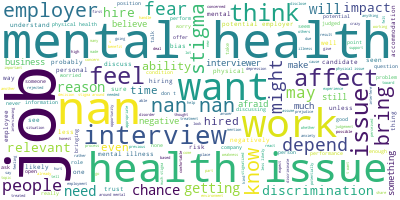

In [73]:
# Join the different processed titles together.
long_string = ','.join(list(result['answer_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [87]:
#reference: https://www.projectpro.io/recipes/add-custom-stopwords-and-then-remove-them-from-text

stopwords = nltk.corpus.stopwords.words('english')

In [88]:
custom_stopwords = ["job","mental health","nan",
                    "health issue","want","work"]

In [89]:
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(custom_stopwords)

In [75]:
result.iloc[:,14].value_counts()

No       1257
Maybe     471
Yes       108
Name: Would you bring up your mental health with a potential employer in an interview?, dtype: int64